# Image Denoising with Autoencoders

## Task 1: Introduction and Importing Libraries
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [19]:
import numpy as np

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## Task 2: Data Preprocessing
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float') / 255
x_test = x_test.astype('float') / 255

x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

## Task 3: Adding Noise
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [30]:
x_train_noisy = x_train + np.random.rand(60000, 784) * 0.9
x_test_noisy = x_test + np.random.rand(10000, 784) * 0.9

x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)

In [49]:
def plot(x, p, labels = False):
    plt.figure(figsize=(20,2))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(x[i].reshape(28, 28), cmap="binary")
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(p[i])
    plt.show()

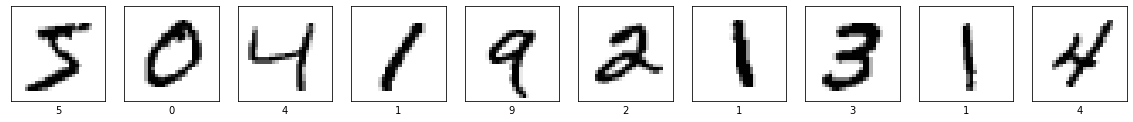

In [52]:
plot(x_train, y_train, True)

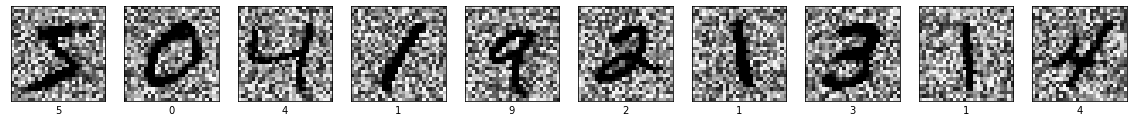

In [53]:
plot(x_train_noisy, y_train, True)

## Task 4: Building and Training a Classifier
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [6]:
classifier = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(x_train, y_train, epochs=3, batch_size=512)

Epoch 1/3
60000/60000 [==============================] - 3s 47us/step - loss: 0.4266 - acc: 0.8841
Epoch 2/3
60000/60000 [==============================] - 2s 36us/step - loss: 0.1502 - acc: 0.9571
Epoch 3/3
60000/60000 [==============================] - 2s 41us/step - loss: 0.1040 - acc: 0.9697


In [81]:
classifier = Sequential([
    Dense(256, activation="relu", input_shape=(784,)),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
])

In [82]:
classifier.compile(loss="sparse_categorical_crossentropy", 
                   optimizer="adam",
                   metrics=["accuracy"])

In [83]:
classifier.fit(x_train, y_train, 
               batch_size=512, 
               epochs=3, 
               validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4187 - accuracy: 0.8855 - val_loss: 0.2024 - val_accuracy: 0.9416
Epoch 2/3
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1502 - accuracy: 0.9562 - val_loss: 0.1187 - val_accuracy: 0.9653
Epoch 3/3
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0985 - accuracy: 0.9711 - val_loss: 0.0949 - val_accuracy: 0.9713


In [85]:
prediction = classifier.predict(x_test)
prediction = np.argmax(prediction, axis=1)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [60]:
loss, acc = classifier.evaluate(x_test, y_test)
print(acc)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.0794 - accuracy: 0.9760
0.976


In [61]:
loss, acc = classifier.evaluate(x_test_noisy, y_test)
print(acc)

10000/10000 [==============================] - 1s 71us/sample - loss: 8.9658 - accuracy: 0.1949
0.1949


## Task 5: Building the Autoencoder
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [63]:
input_image = Input(shape=(784,))
encoded = Dense(64, activation="relu")(input_image)
decoded = Dense(784, activation="sigmoid")(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss="binary_crossentropy", optimizer="adam")

## Task 6: Training the Autoencoder
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [65]:
autoencoder.fit(
    x_train_noisy, 
    x_train, 
    epochs=100,
    batch_size=512,
    validation_split=0.2,
    verbose=False,
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=5),
        LambdaCallback(on_epoch_end=lambda e,l: print("{:.3f}".format(l["val_loss"]), end=" _ "))
    ]
)
print(" - ")
print("Train is Complete !")

0.255 _ 0.217 _ 0.192 _ 0.178 _ 0.169 _ 0.161 _ 0.154 _ 0.149 _ 0.144 _ 0.140 _ 0.136 _ 0.133 _ 0.130 _ 0.127 _ 0.125 _ 0.123 _ 0.121 _ 0.120 _ 0.119 _ 0.117 _ 0.117 _ 0.116 _ 0.115 _ 0.114 _ 0.114 _ 0.113 _ 0.113 _ 0.112 _ 0.112 _ 0.112 _ 0.112 _ 0.111 _ 0.111 _ 0.111 _ 0.111 _ 0.111 _ 0.111 _ 0.111 _ 0.111 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 0.110 _ 

## Task 7: Denoised Images
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [67]:
predict = autoencoder.predict(x_test_noisy)

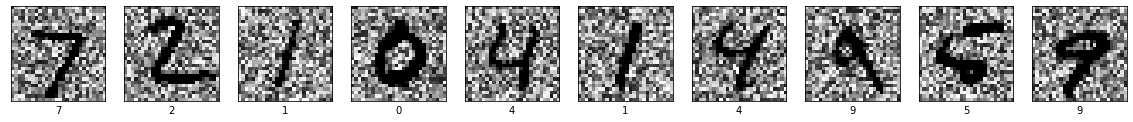

In [68]:
plot(x_test_noisy, y_test, True)

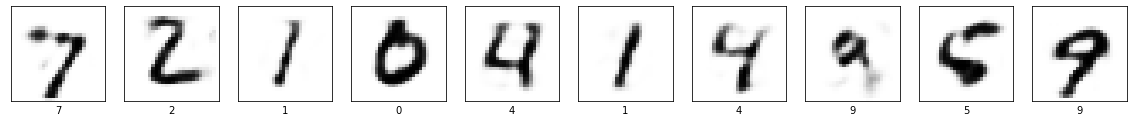

In [69]:
plot(preds, y_test, True)

In [70]:
loss, acc = classifier.evaluate(preds, y_test)
print(acc)

10000/10000 [==============================] - 1s 99us/sample - loss: 0.1688 - accuracy: 0.9484
0.9484


## Task 8: Composite Model
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [72]:
noisy_image = Input(shape=(784,))
x = autoencoder(noisy_image)
y = classifier(x)

denoise_and_classify = Model(noisy_image, y)

In [86]:
prediction = denoise_and_classify.predict(x_test_noisy)
prediction = np.argmax(prediction, axis=1)
print(prediction)

[7 2 1 ... 4 5 6]


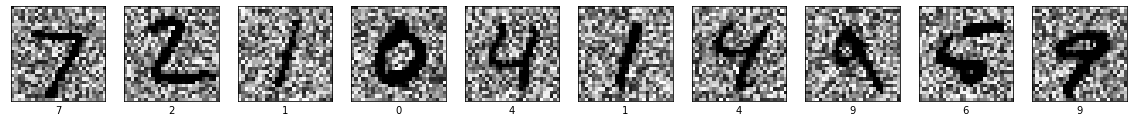

In [88]:
plot(x_test_noisy, prediction, True)

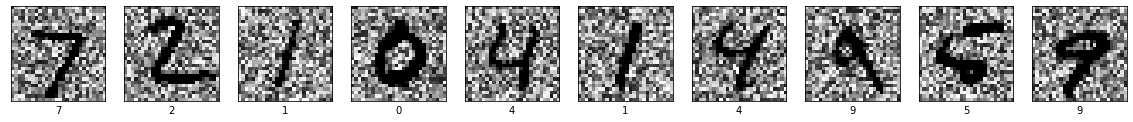

In [89]:
plot(x_test_noisy, y_test, True)